In [2]:
import pandas as pd

ruta_archivo = 'DB_PIA_FINAL.csv'

# Lee el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo, delimiter=',')

# Verifica los primeros registros y los nombres de las columnas
print(df.head())
print('*****')
print(df.columns)


   ticket  item id_producto        producto fecha_venta  cantidad id_tamaño  \
0   10633     1        C001  COMFORT VERONA  07/01/2020         1       22M   
1   11031     1        C001  COMFORT VERONA  11/01/2020         1       22M   
2   11129     1        C001  COMFORT VERONA  12/01/2020         1       22M   
3   11794     1        C001  COMFORT VERONA  18/01/2020         1       24N   
4   15046     1        C001  COMFORT VERONA  20/02/2020         1       18M   

       tamaño  precio_unitario  costo_unitario tipo_calzado  id_local  \
0  22 Y MEDIO             1311             393    CABALLERO        11   
1  22 Y MEDIO             1311             393    CABALLERO        17   
2  22 Y MEDIO             1311             393    CABALLERO        16   
3   24 NORMAL             1311             393    CABALLERO        16   
4  18 Y MEDIO             1311             393    CABALLERO        16   

          local tipo_local id_ciudad            ciudad  total_venta  \
0        ARAGON

In [3]:
import pandas as pd

ruta_archivo_xlsx = 'DB_PIA_FINAL.xlsx'

# Lee el archivo Excel en un DataFrame
df_xlsx = pd.read_excel(ruta_archivo_xlsx)

# Verificar los primeros registros y los nombres de las columnas
print(df_xlsx.head())
print('*****')
print(df_xlsx.columns)


   ticket  item id_producto        producto          fecha_venta  cantidad  \
0   10633     1        C001  COMFORT VERONA  2020-07-01 00:00:00         1   
1   11031     1        C001  COMFORT VERONA  2020-11-01 00:00:00         1   
2   11129     1        C001  COMFORT VERONA  2020-12-01 00:00:00         1   
3   11794     1        C001  COMFORT VERONA           18/01/2020         1   
4   15046     1        C001  COMFORT VERONA           20/02/2020         1   

  id_tamaÃ±o     tamaÃ±o  precio_unitario  costo_unitario tipo_calzado  \
0        22M  22 Y MEDIO             1311             393    CABALLERO   
1        22M  22 Y MEDIO             1311             393    CABALLERO   
2        22M  22 Y MEDIO             1311             393    CABALLERO   
3        24N   24 NORMAL             1311             393    CABALLERO   
4        18M  18 Y MEDIO             1311             393    CABALLERO   

   id_local         local tipo_local id_ciudad             ciudad  \
0        11      

In [4]:
import matplotlib.pyplot as plt

In [5]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])
#ventas por mes

<ipython-input-5-811a1adb6978>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])


In [6]:
ventas_por_mes = df.groupby(df['fecha_venta'].dt.strftime('%Y-%m'))['cantidad'].sum()
#ventas por mes

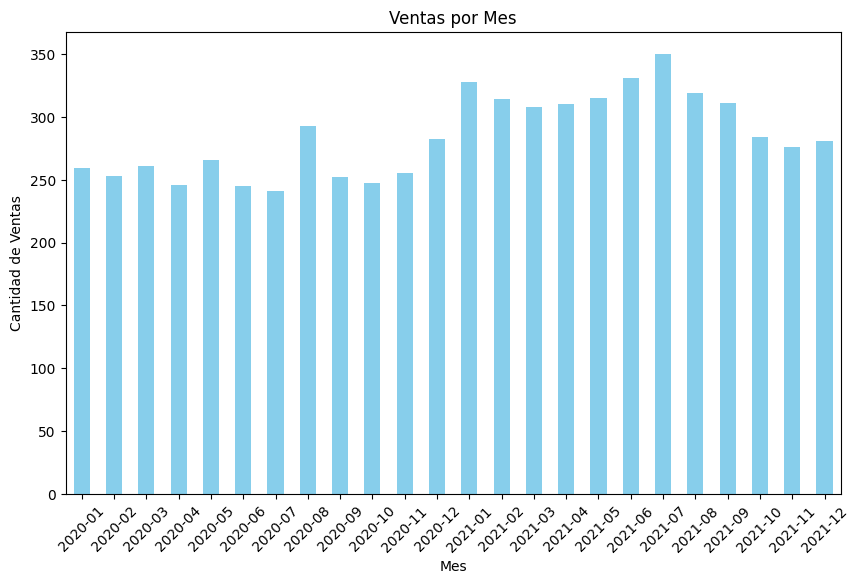

In [7]:
plt.figure(figsize=(10, 6))
ventas_por_mes.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.title('Ventas por Mes')
plt.xticks(rotation=45)
plt.show()
#ventas por mes

In [10]:
ventas_por_localidad = df.groupby('local')['cantidad'].sum().sort_values(ascending=False).head(10)
#ventas por lugar

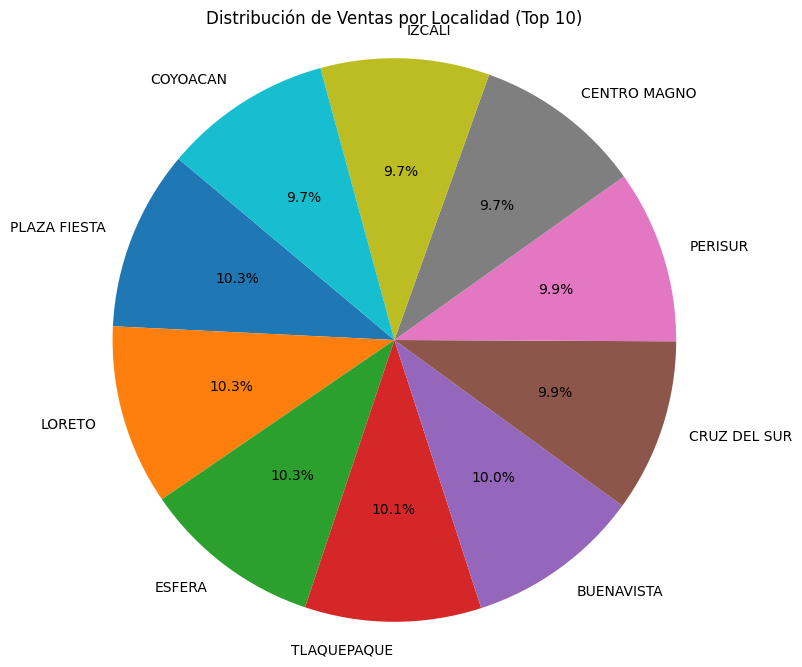

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_localidad, labels=ventas_por_localidad.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de Ventas por Localidad (Top 10)')
plt.show()
#ventas por lugar

In [12]:
ventas_por_dia_semana = df['fecha_venta'].dt.day_name().value_counts()

def obtener_estacion(fecha):
    if fecha.month in range(3, 6):
        return 'Primavera'
    elif fecha.month in range(6, 9):
        return 'Verano'
    elif fecha.month in range(9, 12):
        return 'Otoño'
    else:
        return 'Invierno'

  #ventas por periodo

In [13]:
df['Estacion'] = df['fecha_venta'].apply(obtener_estacion)

ventas_por_estacion = df['Estacion'].value_counts()

#ventas por periodo

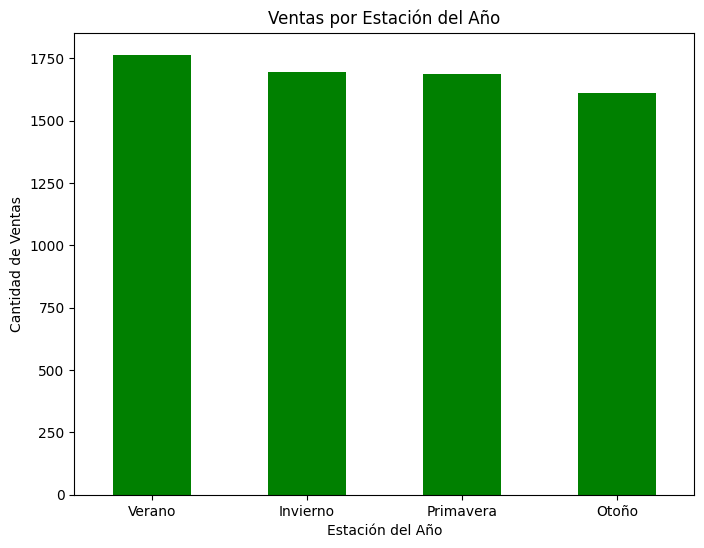

In [14]:
plt.figure(figsize=(8, 6))
ventas_por_estacion.plot(kind='bar', color='green')
plt.xlabel('Estación del Año')
plt.ylabel('Cantidad de Ventas')
plt.title('Ventas por Estación del Año')
plt.xticks(rotation=0)
plt.show()
#ventas por periodo

In [15]:
precio_promedio_por_mes = df.groupby(df['fecha_venta'].dt.to_period('M'))['precio_unitario'].mean()
#variacion de precio promedio

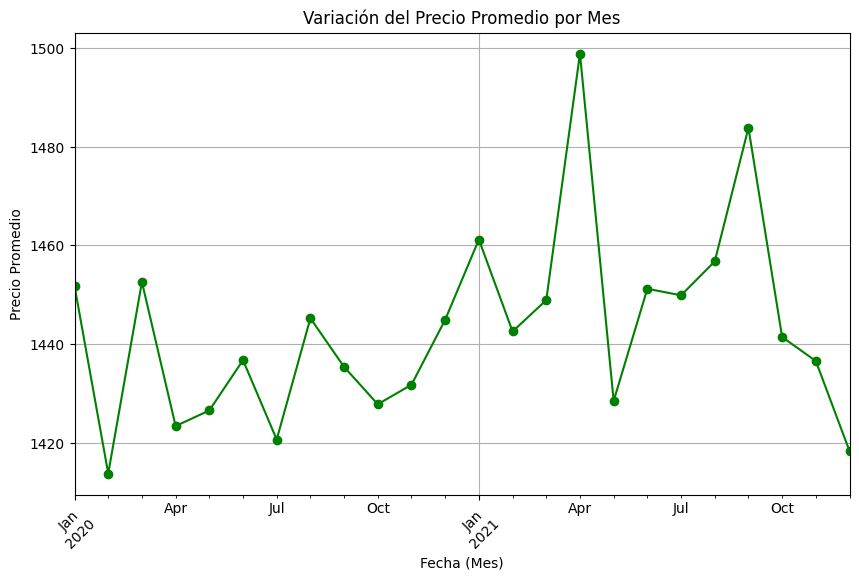

In [16]:
plt.figure(figsize=(10, 6))
precio_promedio_por_mes.plot(kind='line', marker='o', color='green')
plt.xlabel('Fecha (Mes)')
plt.ylabel('Precio Promedio')
plt.title('Variación del Precio Promedio por Mes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [17]:
df['Rentabilidad'] = (df['precio_unitario'] - df['costo_unitario']) * df['cantidad']
rentabilidad_por_producto = df.groupby('producto')['Rentabilidad'].sum().sort_values(ascending=False)
print(rentabilidad_por_producto.head())
#rentabilidad

producto
CITUAN              619402
CONFORT MILAN       584050
ULTRA-ALIVE         569777
SERENA STORM        558368
CONFORT NEW YORK    540661
Name: Rentabilidad, dtype: int64


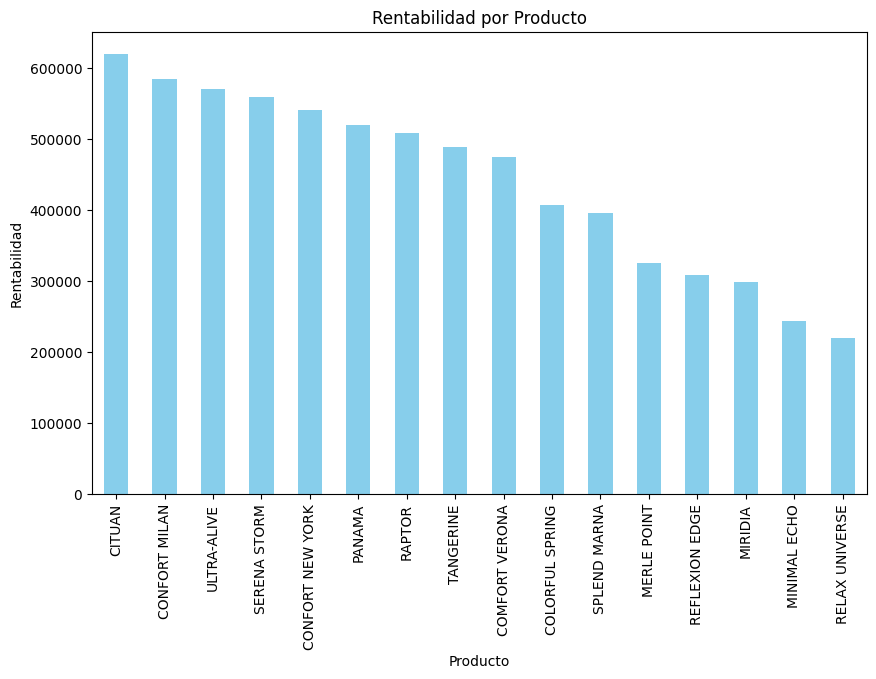

In [18]:
plt.figure(figsize=(10, 6))
rentabilidad_por_producto.plot(kind='bar', color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Rentabilidad')
plt.title('Rentabilidad por Producto')
plt.xticks(rotation=90)
plt.show()
#rentabilidad